In [1]:
import numpy as np
import pandas as pd

def generate_dataset(num_samples=200, seed=123):
    np.random.seed(seed)

    # Numeric continuous features
    age = np.random.randint(18, 70, size=num_samples)  # Age in years
    salary = np.random.normal(loc=60000, scale=15000, size=num_samples).astype(int)  # Annual salary in USD
    years_experience = np.clip(np.random.normal(loc=10, scale=5, size=num_samples), 0, None).astype(int)  # Years of experience

    # Categorical features
    departments = ['HR', 'IT', 'Finance', 'Marketing', 'Sales']
    department = np.random.choice(departments, size=num_samples)

    education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
    education = np.random.choice(education_levels, size=num_samples, p=[0.2, 0.5, 0.25, 0.05])

    # Target / label - e.g., whether employee is a manager (binary)
    is_manager = (years_experience > 8) & (salary > 65000)
    is_manager = is_manager.astype(int)

    # Build DataFrame
    df = pd.DataFrame({
        'Age': age,
        'Salary': salary,
        'YearsExperience': years_experience,
        'Department': department,
        'EducationLevel': education,
        'IsManager': is_manager
    })

    return df

# Example usage
df = generate_dataset()
df.head()

,Age,Salary,YearsExperience,Department,EducationLevel,IsManager
0,63,73962,17,IT,Master,1
1,20,60695,9,IT,Master,0
2,46,80051,6,HR,High School,0
3,52,64203,4,Finance,Bachelor,0
4,56,82449,10,Finance,Bachelor,1


In [2]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Task: Department-wise Salary Distribution and Managerial Status

1. Create a boxplot showing the salary distribution for each department

C:\Users\sivakumar\AppData\Local\Temp\ipykernel_9196\3430934313.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Is Manager', loc='upper right')


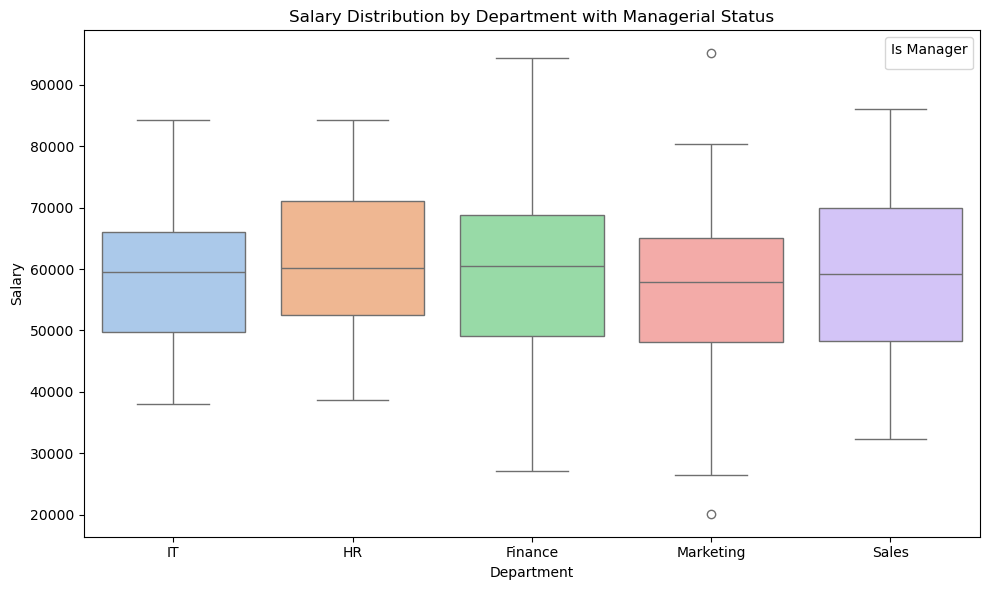

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df, palette='pastel')
plt.title('Salary Distribution by Department with Managerial Status')
plt.legend(title='Is Manager', loc='upper right')
plt.tight_layout()
plt.show()

2. Overlay or color the data points by managerial status (IsManager) to observe how salaries differ for managers and non-managers within departments

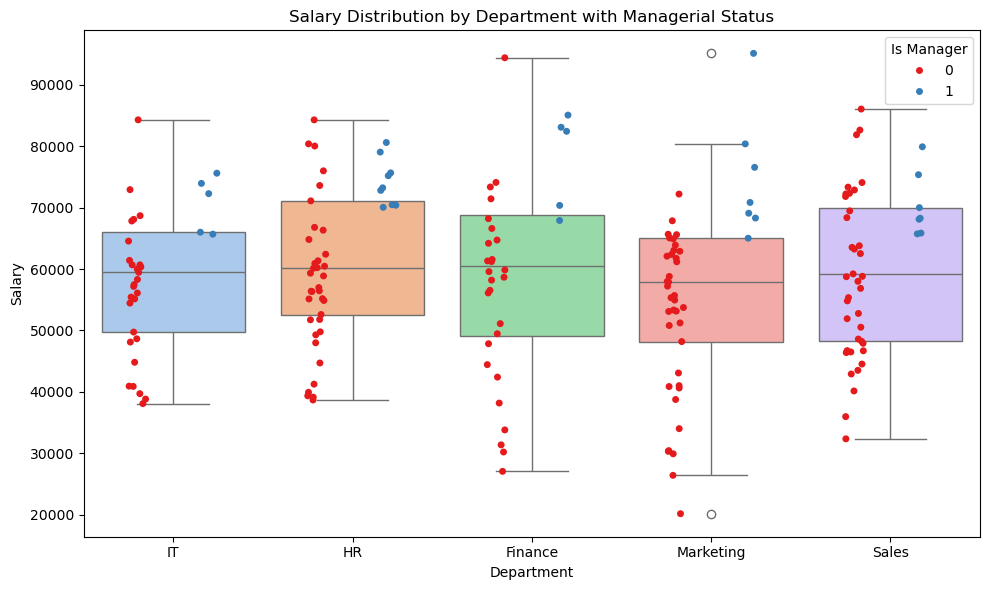

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df, palette='pastel')
sns.stripplot(x='Department', y='Salary', data=df, hue='IsManager', dodge=True, jitter=True, marker='o', palette='Set1')
plt.title('Salary Distribution by Department with Managerial Status')
plt.legend(title='Is Manager', loc='upper right')
plt.tight_layout()
plt.show()

3. Summarize any differences in salary spread and median values among departments and between managerial groups

In [5]:
dept_summary = df.groupby('Department')['Salary'].describe()[['min', '25%', '50%', '75%', 'max']]
print("Department-wise Salary Summary: \n")
print(dept_summary)

Department-wise Salary Summary: 

                min      25%      50%       75%      max
Department                                              
Finance     27041.0  49054.0  60542.5  68757.25  94432.0
HR          38667.0  52597.0  60232.0  71116.00  84315.0
IT          38079.0  49737.0  59471.0  66008.00  84319.0
Marketing   20140.0  48185.0  57904.0  65029.00  95152.0
Sales       32339.0  48224.0  59219.0  70012.00  86078.0
